# Introduction to Artificial Intelligence: HS 2023


---

## Lecture 6: Ensemble Models

## Part 1: Preparing dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load the data

We use the Pima Indian Diabetes dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Task (a): Split the dataframe into two sub-frames: Extract the column `Outcome` in the target frame `y`, use the other columns as model input `X`

In [ ]:
#X =

#names= ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
#X = df[names]
X = df.drop("Outcome", axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


#### Task (b): Split the input `X` and the target `y` in training-set and test-set using the function `sklearn.model_selection.train_test_split`. Keep 70\% of the data as training data

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=True)
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(537, 8)
(537,)
(231, 8)
(231,)


## Part 2: Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### Task (a): Build a `sklearn.tree.DecisionTreeClassifier` and fit it on the training data

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(xTrain, yTrain)

DecisionTreeClassifier()

#### Task (b): For all persons in the test data: Predict if they have diabetes or not. Then, calculate the accuracy using `sklearn.metrics.accuracy`

In [ ]:
import numpy as np
y_pred = clf.predict(xTest)
print(y_pred)
print(np.array(yTest))

[0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(yTest, y_pred)
print("Accuracy:", acc)

Accuracy: 0.70995670995671


#### We install some packages to visualize the tree... (if it doesn't work: install them using the terminal)

#### Task (c) Install Graphviz: [https://graphviz.org/download/](https://graphviz.org/download/)

In [ ]:
!pip install graphviz
!pip install pydotplus

#### Visualize the tree:

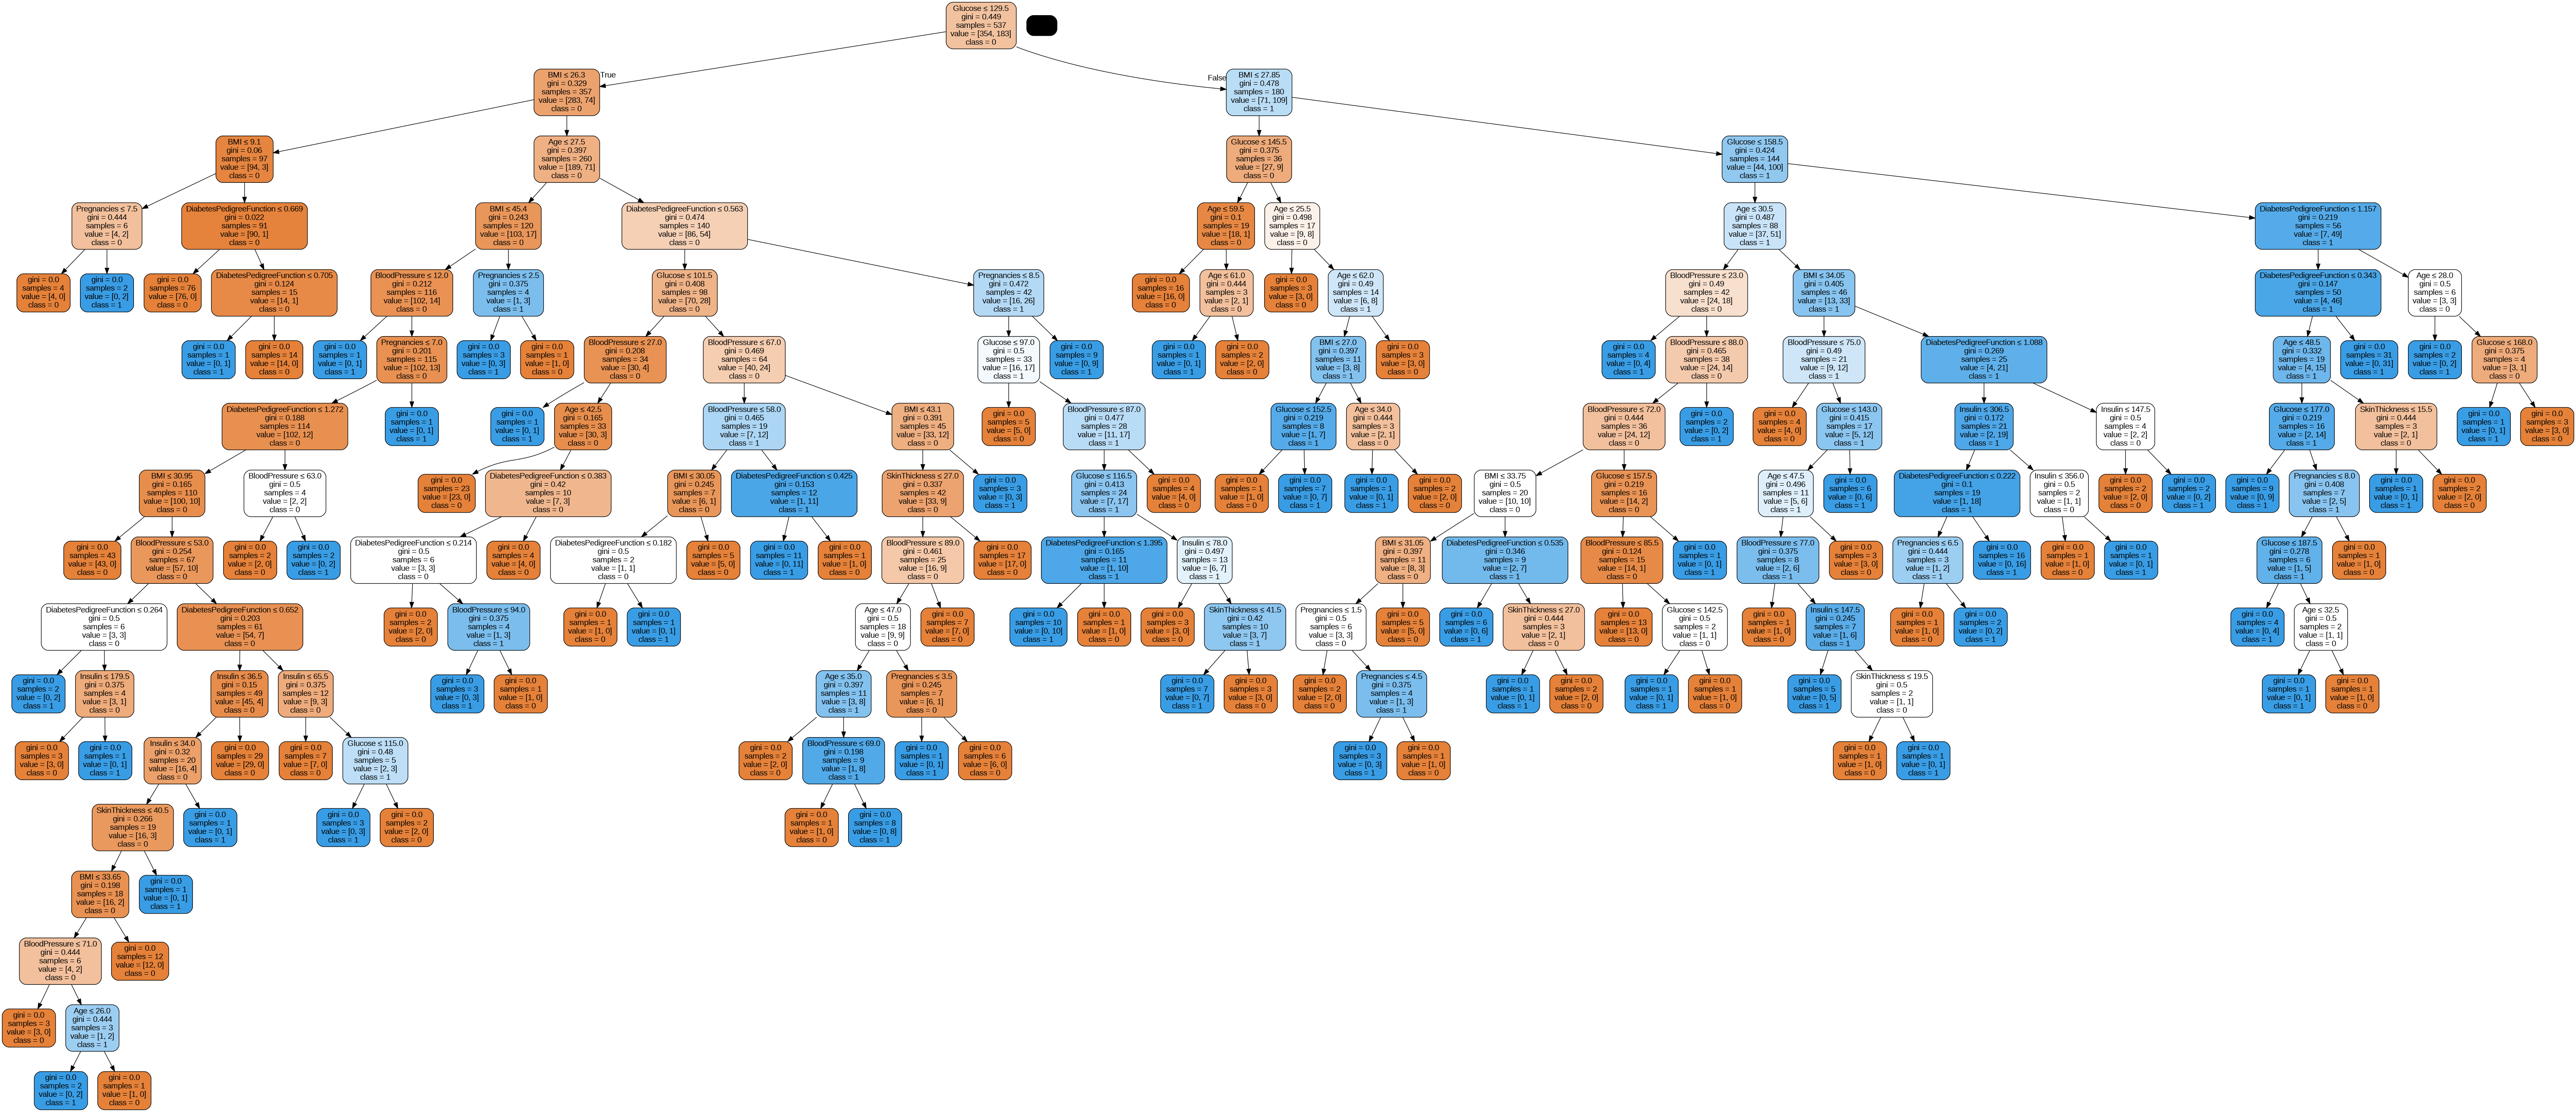

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=list(X.keys()),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

#### Task (d) Optimize the performance: Try out different values for the parameters `criterion` and `max_depth`. Calculate the accuracy again - When does it improve? Why perform smaller trees often better?

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, criterion="gini") # initialising our DT model
clf.fit(xTrain, yTrain) # estimating the model's parameters
y_pred = clf.predict(xTest) # get class predictions on the test dataset
acc = accuracy_score(yTest, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7575757575757576


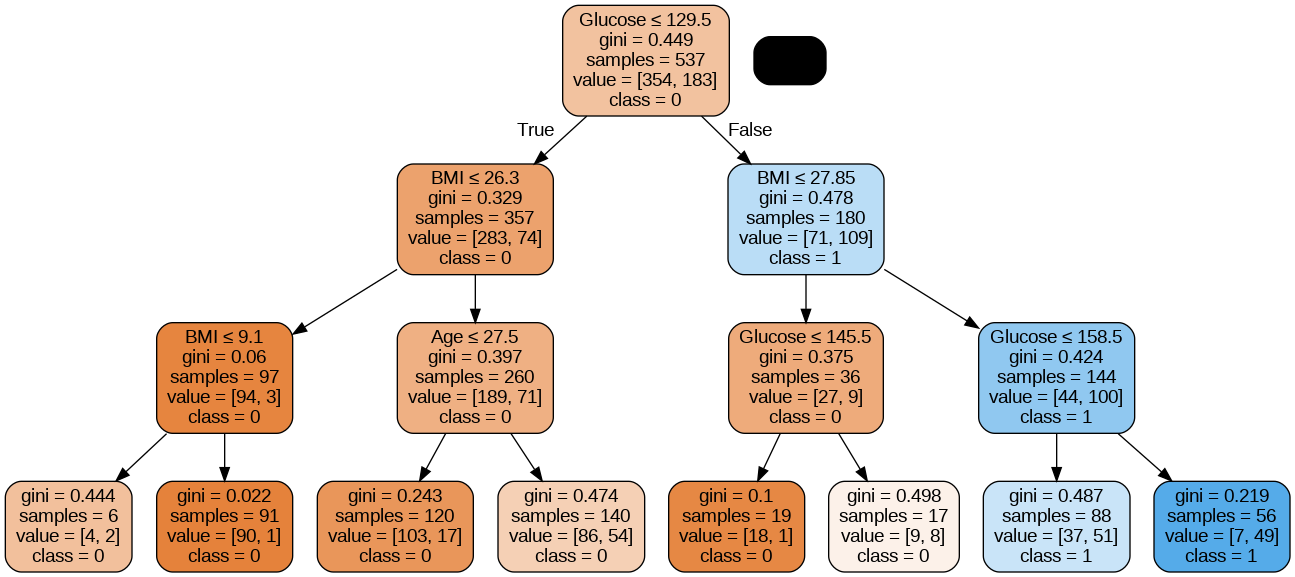

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=list(X.keys()),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

## Part 3: Random Forests

#### Task (a): Build a `sklearn.ensemble.RandomForestClassifier` and fit it on the training data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(xTrain, yTrain)

RandomForestClassifier(random_state=1)

#### Task (b): For all persons in the test data: Predict if they have diabetes or not. Then, calculate the accuracy using `sklearn.metrics.accuracy`

In [ ]:
y_pred_rf = forest.predict(xTest)

In [ ]:
acc = accuracy_score(yTest, y_pred_rf)
print("Accuracy:", acc)

Accuracy: 0.7878787878787878


#### Task (c): Calculate the confusion matrix using `sklearn.metrics.confusion_matrix` and visualise the results using seaborn's heatmap.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, y_pred_rf)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[131  15]
 [ 34  51]]


<Axes: >

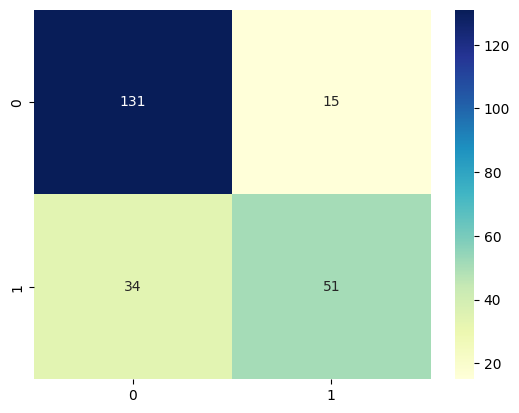

In [ ]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Part 4: Gradient Boosting

#### Task (a): Build a `sklearn.ensemble.GradientBoostingClassifier` and fit it on the training data

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gdboost = GradientBoostingClassifier(n_estimators=25, max_depth=4, random_state=1)
gdboost.fit(xTrain, yTrain)

GradientBoostingClassifier(max_depth=4, n_estimators=25, random_state=1)

#### Task (b): For all persons in the test data: Predict if they have diabetes or not. Then, calculate the accuracy using `sklearn.metrics.accuracy`

In [ ]:
y_pred_gdboost = gdboost.predict(xTest)

In [ ]:
acc = accuracy_score(yTest, y_pred_gdboost)
print("Accuracy:", acc)

Accuracy: 0.8181818181818182


In [ ]:
print("Test Accuracy: %0.2f" % ...)  # You can also use directly the 'score' method

Test Accuracy: 0.82


#### Task (c): Calculate the confusion matrix using `sklearn.metrics.confusion_matrix` and visualise the results using seaborn's heatmap.

In [ ]:
cm = confusion_matrix(yTest, y_pred_gdboost)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[131  15]
 [ 27  58]]


<Axes: >

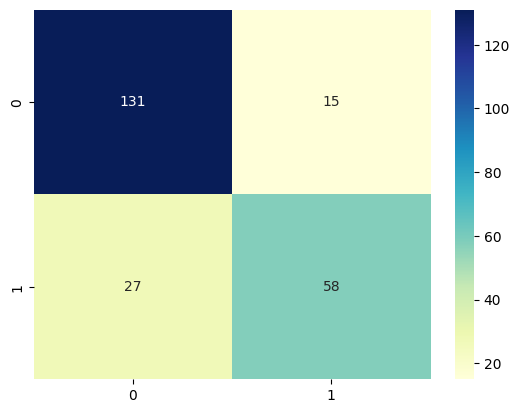

In [ ]:
# visualize confusion matrix with seaborn heatmap
#cm_matrix = ...

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Part 5: Feature Importance

Most of the boosting approaches, allow to analyse the importance of features on the specific task. USe the `feature_importances_` attribute from your trained methods to plot the best fitted attributes and analyse the results. The visualisation below is an example of the selected features from the trained Random Forest


In [ ]:
forest.feature_importances_

array([0.08423049, 0.24023946, 0.0980106 , 0.06920449, 0.06992981,
       0.17608715, 0.13128338, 0.13101461])

In [ ]:
forest.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [ ]:
# Display the scores of each feature:
feature_scores = pd.Series(forest.feature_importances_, index=xTrain.columns)
feature_scores = feature_scores.sort_values(ascending=False)
feature_scores

Glucose                     0.240239
BMI                         0.176087
DiabetesPedigreeFunction    0.131283
Age                         0.131015
BloodPressure               0.098011
Pregnancies                 0.084230
Insulin                     0.069930
SkinThickness               0.069204
dtype: float64

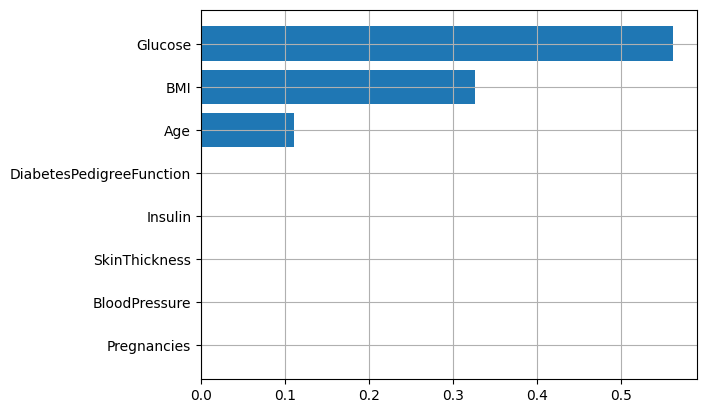

In [ ]:
# Plot the different features by their relevances:
...
...
...
...

Additionally, the scikit-learn library has a `SelectFromModel` class for extracting the best features of a given dataset according to the importance of the learned parameters. Now, use the meta-estimator to automatically predict the most important features on the `diabetes` dataset

In [ ]:
from sklearn.feature_selection import ...
selector = ...
...

SelectFromModel(estimator=DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=3))

In [ ]:
print(X_train.columns[(selector.get_support())])

Index(['Glucose', 'BMI'], dtype='object')
